In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [2]:
feature = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","target","junk"]

In [3]:
os.chdir("C:/Users/ArrunPersonal/Codes/Semester7/IDS/NSL-KDD")

In [4]:
df1 = pd.read_csv("KDDTrain+.csv", names = feature)
df2 = pd.read_csv("KDDTest+.csv", names = feature)
df = pd.concat([df1, df2], axis=0)
df.drop(["junk"],axis = 1,inplace = True)

In [5]:
df2.isnull().values.any()

False

In [6]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [7]:
protocol_dict = dict(zip(set(df['protocol_type']),np.arange(len(set(df['protocol_type'])))))
service_dict = dict(zip(set(df['service']),np.arange(len(set(df['service'])))))
flag_dict = dict(zip(set(df['flag']),np.arange(len(set(df['flag'])))))

In [8]:
# changing attack labels to their respective attack class
def change_feature(df):
    df.target.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
    df.target.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy'
                       ,'warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
    df.target.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
    df.target.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)
    
    df.protocol_type.replace(protocol_dict.keys(),protocol_dict.values(),inplace=True)
    df.service.replace(service_dict.keys(),service_dict.values(),inplace=True)
    df.flag.replace(flag_dict.keys(),flag_dict.values(),inplace=True)

In [9]:
change_feature(df)

In [10]:
target_dict = dict(zip(set(df['target']),np.arange(len(set(df['target'])))))

In [11]:
def change_target(df):
    df.target.replace(target_dict.keys(),target_dict.values(),inplace=True)

In [12]:
change_target(df)

In [13]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,0,11,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,3
1,0,1,48,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,3
2,0,0,32,10,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,0,51,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,3
4,0,0,51,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3


In [14]:
df_lis = np.array(df.values.tolist())

In [15]:
from scipy.stats import pearsonr

In [16]:
features = np.array(df_lis[:,:-1])
labels = np.array(df_lis[:,-1])

In [17]:
scores = [abs(pearsonr(features[:,i],labels)[0]) for i in range(np.shape(features)[1])]

C:\Users\ArrunPersonal\anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [18]:
scores[19] = 0
scores

[0.01686814728669215,
 0.0008903318415672777,
 0.2297422927796742,
 0.10701307653563152,
 0.0012141388333351704,
 0.0012770730419773397,
 0.011162276352596678,
 0.09642082940869305,
 0.006053383795186608,
 0.0844752868794143,
 0.0846781678549625,
 0.660688205015685,
 0.008993833945926441,
 0.028677707720451886,
 0.019983490565798342,
 0.010269378860652595,
 0.019025884784639218,
 0.012744438040788529,
 0.03673622898213086,
 0,
 0.009265468432136038,
 0.13408191988598217,
 0.5920518067630516,
 0.025936664492478386,
 0.6817167490901206,
 0.6799499561330806,
 0.26735589027610057,
 0.26577034800130456,
 0.7833685135471095,
 0.1545054952530892,
 0.1471083215375158,
 0.4252036322403124,
 0.6580151407302548,
 0.6903593469555097,
 0.1555246044441042,
 0.037210074078096025,
 0.03442751095901751,
 0.6819161268096257,
 0.6863693812079862,
 0.27430736943867096,
 0.2636032552782233]

In [19]:
act_features = []
act_indices = []
for i in range(len(scores)):
    if(scores[i]> 0.1):
        act_indices.append(i)
        act_features.append(features[:,i])

In [20]:
act_features = np.array(act_features).T

In [21]:
for i in range(np.shape(act_features)[1]):
    if(np.std(act_features[:,i])!=0):
        act_features[:,i] = (act_features[:,i]-np.mean(act_features[:,i]))/np.std(act_features[:,i]) 
    else:
        act_features[:,i] = (act_features[:,i]-np.mean(act_features[:,i]))
np.shape(act_features)

(148517, 20)

In [22]:
train_X = act_features[:len(df1)]
test_X = act_features[len(df1):]
train_Y = labels[:len(df1)]
test_Y = labels[len(df1):]

In [23]:
from sklearn.model_selection import train_test_split 

In [24]:
test_X, val_X , test_Y ,val_Y = train_test_split(test_X,test_Y,random_state = 42,test_size = 0.1)

In [25]:
print(np.shape(train_X),np.shape(test_X),np.shape(val_X),np.shape(train_Y),np.shape(test_Y),np.shape(val_Y))

(125973, 20) (20289, 20) (2255, 20) (125973,) (20289,) (2255,)


In [26]:
val,counts = np.unique(np.array(labels,dtype = 'int16'),return_counts = True)
counts = 1 - counts/np.linalg.norm(counts)
new_counts = np.exp(counts)/np.sum(np.exp(counts))
label_dict = dict(zip(val,new_counts))

In [27]:
label_dict

{0: 0.14856723519253834,
 1: 0.2248390471339878,
 2: 0.26047558789153663,
 3: 0.11576653433285747,
 4: 0.2503515954490797}

In [28]:
from keras.layers import *
from keras.models import Model
from keras_self_attention import SeqSelfAttention

In [35]:
batch_size = 128
input_dim = np.shape(train_X)[1]
#Input Layer

input_layer = Input(shape=input_dim, name='input')
#Encoder’s first dense layer
encoder = Dense (128, activation='relu')(input_layer)
#Encoder’s second dense layer
encoder = Dense (64, activation='relu')(encoder)
# Code layer
latent_layer = Dense (32, activation='relu',name = 'latent_1')(encoder)
# Decoder’s first dense layer
decoder = Dense(64, activation='relu')(latent_layer)
# Decoder’s second dense layer
decoder = Dense(128, activation='relu')(decoder)
# Decoder’s Third dense layer
decoder = Dense(256, activation='relu')(decoder)
# Output Layer
decoder = Dense(input_dim, activation='relu')(decoder)

In [36]:
autoencoder_1 = Model(inputs=input_layer, outputs=decoder)
autoencoder_1.compile(metrics=['accuracy'],loss='mse',optimizer='adam')

In [37]:
autoencoder_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 20)]              0         
                                                                 
 dense_7 (Dense)             (None, 128)               2688      
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 latent_1 (Dense)            (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 256)               3302

In [38]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8,restore_best_weights=True)

In [39]:
stack_1 = autoencoder_1.fit(train_X, train_X, epochs=100, batch_size=batch_size,validation_data = (val_X,val_X),callbacks = [callback])

Epoch 1/100
985/985 [==============================] - 4s 3ms/step - loss: 0.3950 - accuracy: 0.4862 - val_loss: 0.4983 - val_accuracy: 0.5002
Epoch 2/100
985/985 [==============================] - 3s 3ms/step - loss: 0.3763 - accuracy: 0.5356 - val_loss: 0.4950 - val_accuracy: 0.5805
Epoch 3/100
985/985 [==============================] - 3s 3ms/step - loss: 0.3759 - accuracy: 0.5517 - val_loss: 0.4939 - val_accuracy: 0.5415
Epoch 4/100
985/985 [==============================] - 3s 3ms/step - loss: 0.3758 - accuracy: 0.5614 - val_loss: 0.4929 - val_accuracy: 0.5796
Epoch 5/100
985/985 [==============================] - 3s 3ms/step - loss: 0.3757 - accuracy: 0.5663 - val_loss: 0.4926 - val_accuracy: 0.5663
Epoch 6/100
985/985 [==============================] - 3s 3ms/step - loss: 0.3756 - accuracy: 0.5719 - val_loss: 0.4917 - val_accuracy: 0.5450
Epoch 7/100
985/985 [==============================] - 3s 3ms/step - loss: 0.3756 - accuracy: 0.5772 - val_loss: 0.4919 - val_accuracy: 0.5894

In [40]:
pred = autoencoder_1.predict(act_features)

4642/4642 [==============================] - 5s 955us/step


In [41]:
from sklearn.metrics import *
import keras

In [42]:
np.sum(keras.losses.mean_squared_error(pred,act_features))/len(act_features)

0.39038719137370603

In [43]:
layer_name = 'latent_1'
intermediate_layer_model = Model(inputs=autoencoder_1.input,
                                 outputs=autoencoder_1.get_layer(layer_name).output)
intermediate_output_1 = intermediate_layer_model.predict(act_features)

4642/4642 [==============================] - 4s 786us/step


In [45]:
batch_size = 128
input_dim = np.shape(intermediate_output_1)[1]
#Input Layer

input_layer = Input(shape=input_dim, name='input')
#Encoder’s first dense layer
encoder = Dense (64, activation='relu')(input_layer)
#Encoder’s second dense layer
encoder = Dense (32, activation='relu')(encoder)
# Code layer
latent_layer = Dense (16, activation='relu',name = 'latent_2')(encoder)
# Decoder’s first dense layer
decoder = Dense(32, activation='relu')(latent_layer)
# Decoder’s second dense layer
decoder = Dense(64, activation='relu')(decoder)
# Decoder’s Third dense layer
decoder = Dense(128, activation='relu')(decoder)
# Output Layer
decoder = Dense(input_dim, activation='relu')(decoder)

In [46]:
autoencoder_2 = Model(inputs=input_layer, outputs=decoder)
autoencoder_2.compile(metrics=['accuracy'],loss='mse',optimizer='adam')

In [47]:
autoencoder_2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 32)]              0         
                                                                 
 dense_14 (Dense)            (None, 64)                2112      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 latent_2 (Dense)            (None, 16)                528       
                                                                 
 dense_16 (Dense)            (None, 32)                544       
                                                                 
 dense_17 (Dense)            (None, 64)                2112      
                                                                 
 dense_18 (Dense)            (None, 128)               8320

In [48]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8,restore_best_weights=True)

In [49]:
train_intX = intermediate_output_1[:len(df1)]
test_intX = intermediate_output_1[len(df1):]
train_intY = labels[:len(df1)]
test_intY = labels[len(df1):]

In [50]:
test_intX, val_intX , test_intY ,val_intY = train_test_split(test_intX,test_intY,random_state = 42,test_size = 0.1)

In [51]:
stack_2 = autoencoder_2.fit(train_intX, train_intX, epochs=100, batch_size=batch_size,callbacks = [callback],validation_data = (val_intX, val_intX))

Epoch 1/100
985/985 [==============================] - 4s 3ms/step - loss: 0.0500 - accuracy: 0.7279 - val_loss: 0.0371 - val_accuracy: 0.8186
Epoch 2/100
985/985 [==============================] - 2s 2ms/step - loss: 0.0286 - accuracy: 0.8689 - val_loss: 0.0323 - val_accuracy: 0.8506
Epoch 3/100
985/985 [==============================] - 3s 3ms/step - loss: 0.0274 - accuracy: 0.8826 - val_loss: 0.0299 - val_accuracy: 0.8767
Epoch 4/100
985/985 [==============================] - 2s 2ms/step - loss: 0.0270 - accuracy: 0.8950 - val_loss: 0.0294 - val_accuracy: 0.8891
Epoch 5/100
985/985 [==============================] - 2s 2ms/step - loss: 0.0268 - accuracy: 0.8994 - val_loss: 0.0284 - val_accuracy: 0.8896
Epoch 6/100
985/985 [==============================] - 3s 3ms/step - loss: 0.0267 - accuracy: 0.9012 - val_loss: 0.0276 - val_accuracy: 0.8984
Epoch 7/100
985/985 [==============================] - 3s 3ms/step - loss: 0.0266 - accuracy: 0.9048 - val_loss: 0.0270 - val_accuracy: 0.8927

In [52]:
pred = autoencoder_2.predict(intermediate_output_1)

4642/4642 [==============================] - 2s 526us/step


In [53]:
layer_name = 'latent_2'
intermediate_layer_model = Model(inputs=autoencoder_2.input,
                                 outputs=autoencoder_2.get_layer(layer_name).output)
intermediate_output_2 = intermediate_layer_model.predict(intermediate_output_1)

4642/4642 [==============================] - 2s 443us/step


In [54]:
batch_size = 128
input_dim = np.shape(intermediate_output_2)[1]
input_layer = Input(shape=(input_dim), name='input')
#Input Layer
dense1 = Dense (128, activation='relu')(input_layer)
dense2 = Dense (64, activation='relu')(dense1)
dense3 = Dense (8, activation='relu')(dense2)
# Output Layer
classifier = Dense(len(set(train_Y)), activation='softmax')(dense3)

In [55]:
classify = Model(inputs=input_layer, outputs=classifier)
classify.compile(metrics=['accuracy'],loss='sparse_categorical_crossentropy',optimizer='adam')

In [56]:
train_intX = intermediate_output_2[:len(df1)]
test_intX = intermediate_output_2[len(df1):]
train_intY = labels[:len(df1)]
test_intY = labels[len(df1):]

In [57]:
test_intX, val_intX , test_intY ,val_intY = train_test_split(test_intX,test_intY,random_state = 42,test_size = 0.1)

In [58]:
history = classify.fit(train_intX, train_intY, epochs=100, batch_size=32,class_weight = label_dict,callbacks = [callback],validation_data = (val_intX, val_intY))

Epoch 1/100
3937/3937 [==============================] - 4s 781us/step - loss: 0.0269 - accuracy: 0.9499 - val_loss: 1.1714 - val_accuracy: 0.7290
Epoch 2/100
3937/3937 [==============================] - 3s 734us/step - loss: 0.0144 - accuracy: 0.9685 - val_loss: 1.1637 - val_accuracy: 0.7388
Epoch 3/100
3937/3937 [==============================] - 3s 718us/step - loss: 0.0117 - accuracy: 0.9741 - val_loss: 1.2580 - val_accuracy: 0.7583
Epoch 4/100
3937/3937 [==============================] - 3s 716us/step - loss: 0.0106 - accuracy: 0.9758 - val_loss: 1.4271 - val_accuracy: 0.7392
Epoch 5/100
3937/3937 [==============================] - 3s 718us/step - loss: 0.0099 - accuracy: 0.9771 - val_loss: 1.2799 - val_accuracy: 0.7517
Epoch 6/100
3937/3937 [==============================] - 3s 713us/step - loss: 0.0094 - accuracy: 0.9784 - val_loss: 1.3029 - val_accuracy: 0.7419
Epoch 7/100
3937/3937 [==============================] - 3s 713us/step - loss: 0.0090 - accuracy: 0.9786 - val_loss: 1

# Testing on KDD Test

In [70]:
features = act_features[len(df1):]
labels = labels[len(df1):]

In [71]:
layer_name = 'latent_1'
intermediate_layer_model = Model(inputs=autoencoder_1.input,
                                 outputs=autoencoder_1.get_layer(layer_name).output)
intermediate_output_1 = intermediate_layer_model.predict(features)

705/705 [==============================] - 0s 449us/step


In [72]:
np.shape(intermediate_output_1)

(22544, 32)

In [73]:
layer_name = 'latent_2'
intermediate_layer_model = Model(inputs=autoencoder_2.input,
                                 outputs=autoencoder_2.get_layer(layer_name).output)
intermediate_output_2 = intermediate_layer_model.predict(intermediate_output_1)

705/705 [==============================] - 0s 419us/step


In [74]:
final_prediction = classify.predict(intermediate_output_2)

705/705 [==============================] - 0s 442us/step


In [75]:
np.shape(final_prediction),np.shape(labels)

((22544, 5), (22544,))

In [76]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(np.argmax(final_prediction,axis = 1), labels)

In [77]:
import seaborn as sns

<AxesSubplot:>

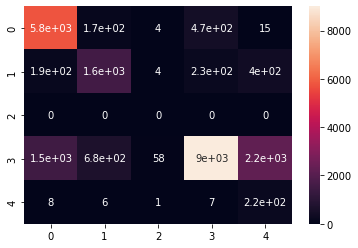

In [78]:
sns.heatmap(conf_mat, annot=True)

In [79]:
print(accuracy_score(np.argmax(final_prediction,axis = 1),labels))
print(precision_score(np.argmax(final_prediction,axis = 1),labels,average = 'macro'))
print(recall_score(np.argmax(final_prediction,axis = 1),labels,average = 'macro'))
print(f1_score(np.argmax(final_prediction,axis = 1),labels,average = 'macro'))

0.7347853087295955
0.48507381810614525
0.6261277727026616
0.4802327394243767


C:\Users\ArrunPersonal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
